# A quick assessment of the 2019 Austrian EP election results

#### János Brezniczky

"People, Not Technology, Weakest Security Link" - Kevin Mitnick

#### Last updated: 31/08/2019

First of all, I am not a statistician, but an enthusiastic hobbyist. Expect humps, bumps and speculations :)

# Brief motivation/context

It's about taking a look at Austrian data, but at the same time a demo of a package to help with the detection of digit doctoring, also playing with theories, and a bit of motivation for you to **do your share and keep an eye on your local elections**.

At the time writing, four countries will hold elections in the aftermath of the 2019 European Parliamentary elections, within two months' time.

Three of these are interesting in the sense that populist parties have gained a huge influence in each, and potential for Russian influence could be easily identified for each one as well. Of course, it can easily happen that there is some other influence, and that one is higher.

These examinations may be far from a scientific quality, but what better than building conspiracy theories on top of numbers over the weekend? :)

## The elections to prepare for, three countries to pick from

1. Hungary, 13th October - e.g. see ["Moscow's trojan horse"](https://www.foreignaffairs.com/articles/central-europe/2014-08-06/moscows-trojan-horse) from 2014, by Jan Werner-Müller, professor at Princeton, about Fidesz, the most popular (?) Hungarian party
2. Poland, 13th October - e.g. PiS, the most popular Polish party, is very much a populist party, and with very good ties with Fidesz, albeit not pro-Russia (although being openly that would be kind of a political suicide there I suppose)
3. Austria, 29th September - e.g. see the [Strache scandal](https://en.wikipedia.org/wiki/Ibiza_affair): someone really thought that the Russians are among the go-to people if you want to win an election

The most interesting and suspicious one is probably Hungary to the author. This country is left with what remains of the dossiers documenting the ex-members of the local soviet era secret police members held secret (allegedly, with more complete copies in Moscow ;) ). That might mean Russia remains to hold an unknown degree of influence there, and a sizeable potential for blackmailing, not only for them. The proposal for these to be published has been downvoted [at least 18 times](https://24.hu/kozelet/2018/10/30/tizennyolcadszor-is-leszavazta-a-fidesz-az-ugynokaktak-nyilvanossagat/) by now by our esteemed Fidesz party, which has turned into a pro-Russia rightwing whatever from a once liberal-civic party, around the time an alleged amount of kompromats have allegedly [moved from maffia into Russian hands](https://atlatszo.hu/2017/02/14/valtozatok-egy-kompromatra/). Of course, our second most popular party is also an interesting one, likely infiltrated by [Russian spies](https://444.hu/tag/kgbela). Interdepartmental competition? :) So many popssibilities. They both voted on the extension of the Paks nuclear power plant by Rosatom in 2014, in those turbulent years when sustainable energy was already showing a rapid global spreadth, and exponential price falls made it nearly obvious (except for a large percentage of the way overpaid slow thinkers in the Hungarian Parliament) that it'll soon be almost impossible to justify not preferring it over the nuke.

Well, who knows.

The second one would be Poland. Not too sure about the state of such dossiers there, but such strategic artifacts not turning completely to light was surely in the best interests of the leaving Soviet forces. And there are all sorts of suspicions about a sad incident, [the Smolensk air disaster, 2010](https://en.wikipedia.org/wiki/Smolensk_air_disaster) of the not too distant past.

The third one is Austria, definitely never part of the USSR (still close to the borders :) also subject to multiple waves of immigration - of course, including an influx from ex-soviet states, including I suppose Eastern Germany).

Okay, beyond crazy theories, I guess it is just a nice idea to reflect on potential discrepancies in the quality of counted votes at least, in expectation of these coming elections, in the case of the very recently concluded EP ones. The below approach can help highlighting areas where the vote counting quality at least is likely to have gone unusually far South, and may do so again soon.

Having had a go at the first two (see links at the bottom if interested), Austria is the final one in the series of countries to be taken a look at before any other.

(Portugal will also hold elections on the 6th of October, but I have even fewer reasons to suspect anything there than in Austria... or probably the Antarctica :) )

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import drdigit as drd

from AT.preprocessing import get_preprocessed_data

# Preprocessing

In [88]:
df, info = get_preprocessed_data()

df.head()

,GKZ,Gebietsname,Wahl-berechtigte,"Stimmen,abge-gebene","Stimmen,ungültige","Stimmen,gültige",ÖVP,SPÖ,FPÖ,GRÜNE,NEOS,KPÖ,EUROPA,ld_ÖVP,ld_SPÖ,ld_FPÖ,ld_GRÜNE,ld_NEOS,ld_KPÖ,ld_EUROPA
0,G10101,Eisenstadt,10800.0,6292,100,6192,2501,1366,966,790,485,31,53,1,6,6,0,5,1,3
1,G10201,Rust,1597.0,956,26,930,336,287,175,62,53,9,8,6,7,5,2,3,9,8
2,G10301,Breitenbrunn am Neusiedler See,1611.0,1016,18,998,324,330,159,113,63,4,5,4,0,9,3,3,4,5
3,G10302,Donnerskirchen,1533.0,939,20,919,412,246,149,71,37,1,3,2,6,9,1,7,1,3
4,G10303,Großhöflein,1697.0,968,29,939,373,254,186,63,52,5,6,3,4,6,3,2,5,6


In [89]:
info

DataColumnsInfo(
    area_code: 'GKZ',
    valid_votes: 'Stimmen,gültige',
    registered: 'Wahl-berechtigte',
    parties: ['ÖVP', 'SPÖ', 'FPÖ', 'GRÜNE', 'NEOS', 'KPÖ', 'EUROPA'],
)

In [90]:
len(df)

2118

In [91]:
df["group"] = df[info.area_code].str.slice(0, 4)

In [92]:
np.mean(df.groupby("group").aggregate({"GKZ": len}))

GKZ    18.258621
dtype: float64

# 1. Initial assessment

A test is employed to narrow down which parties' results may have been tampered with or treated with less love and care towards accuracy.

In [93]:
tests = {}

for party in info.parties[0:3]:
    for filter_by in ["by row", "by municipality"]:
        filtered = drd.filter_df(df, group_column="group",
                                 value_columns=[party],
                                 entire_groups=filter_by == "by municipality",
                                 min_value=100)
        print("%s by %s: %d" % (party, filter_by, len(filtered)))
        tests[(party, filter_by)] = drd.LodigeTest(
            digits=filtered["ld_" + party],
            group_ids=filtered["group"],
            bottom_n=20,
            ll_iterations=5000,
            quiet=False
        )

ÖVP by by row: 2011
ÖVP by by municipality: 1017
SPÖ by by row: 1353
SPÖ by by municipality: 117
FPÖ by by row: 1444
FPÖ by by municipality: 83


In [94]:
for spec, test in tests.items():
    print(spec, test.p)


cdf for 21 was generated
cdf for 19 was generated
cdf for 25 was generated
cdf for 31 was generated
There were 0 warnings.
('FPÖ', 'by row') 0.7956
There were 0 warnings.
('FPÖ', 'by municipality') 0.977
cdf for 46 was generated
There were 0 warnings.
('ÖVP', 'by municipality') 0.1874
There were 0 warnings.
('SPÖ', 'by municipality') 0.9932
There were 0 warnings.
('SPÖ', 'by row') 0.9488
cdf for 62 was generated
There were 0 warnings.
('ÖVP', 'by row') 0.2324


Apparently, only ÖVP might be worth a closer look, might be suited to be the driver of further explorations.

We can take a look at how these results show up on the score distributions - they aren't nearly as low probabilities as those found in Hungary and Poland.

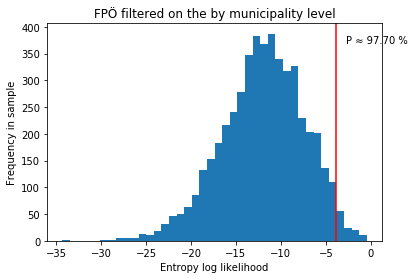

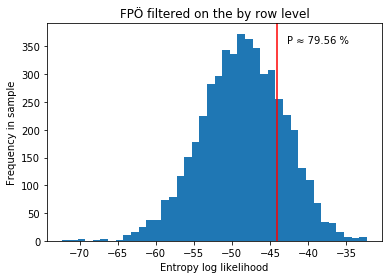

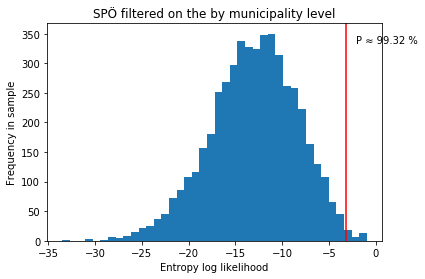

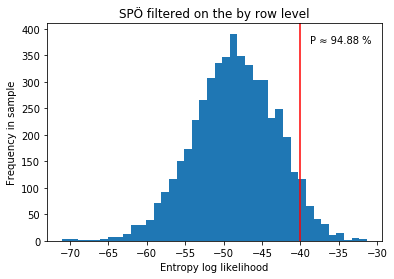

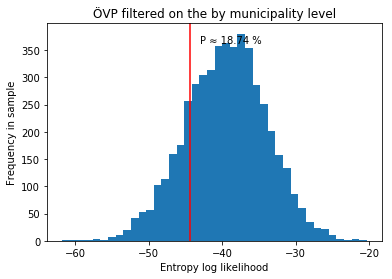

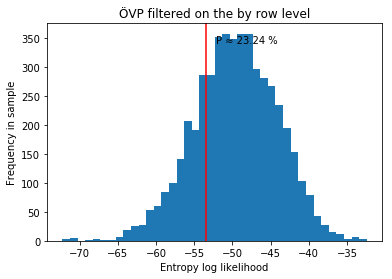

In [95]:
for party, filter_by in sorted(tests.keys()):
    test = tests[(party, filter_by)]
    drd.plot_entropy_distribution(
        actual_total_ent=test.likelihood,
        p=test.p,
        entropies=test.cdf.sample,
        title="%s filtered on the %s level" % (party, filter_by),
    )

<a id="ref_2"></a>

# 2. Scoring and ranking

Well, we could say that that isn't significantly unusual and we'd be right to a good degree.

However, sometimes it is just difficult to look at the right segment of the data where things become more characteristic, so I won't just stop here.

Let's score and rank the ÖVP based column contents where the tests seemed to suggest a higher chance of detectable tampering.

I chose the by row filtered data because - although it comes up slightly more regular - it is just bigger.

In [115]:
df_susp = drd.filter_df(df, value_columns=["ÖVP"], min_value=100)

scores = drd.get_group_scores(df_susp["group"], df_susp["ld_ÖVP"], 
                              [df_susp[info.valid_votes], df_susp["ld_ÖVP"]], 
                              [df_susp["ld_FPÖ"], df_susp["ld_SPÖ"]])

By the way, it is possible to check the help of the functions in the package - feel free to gather more understanding in that way:

In [114]:
help(drd.filter_df)

Help on function filter_df in module drdigit.digit_filtering:

filter_df(df:pandas.core.frame.DataFrame, group_column:str=None, value_columns:typing.List=None, min_value:int=None, min_group_size:int=None, entire_groups=False) -> pandas.core.frame.DataFrame
    Convenience wrapper around the filter() function to apply its concepts to a
    data frame.
    See also: filter()
    
    :param df: Data frame to be filtered.
    :param group_column: Column containing group ids.
    :param value_columns: Names of columns containing values. Use it in 
        conjunction with the min_value argument.  
    :param min_value: Minimum value to expect from any item (row or group) 
        passing the filter in the value columns.
    :param min_group_size: Minimum group length.
    :param entire_groups: Whether groups partly matching the conditions
        (value >= min_value), i.e. not for all rows, are to be excluded.
    :return: The filtered data frame.



In [116]:
ranking = pd.DataFrame(dict(group=scores.index, score=scores))
ranking.sort_values(["score"], inplace=True)
ranking.head()

,group,score
group_id,,
G620,G620,0.000388
G621,G621,0.000512
G411,G411,0.000737
G418,G418,0.001960
G305,G305,0.003413


In [117]:
len(ranking)

116

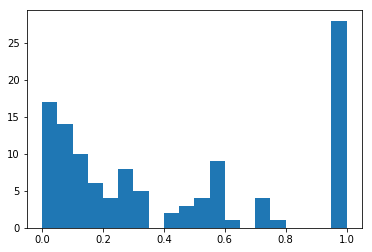

In [118]:
plt.hist(ranking.score, bins=20)
plt.show()

In [119]:
def get_top_group(index):
    group = ranking.iloc[index]["group"]
    return df[df.group==group][["group", "GKZ", info.valid_votes, "ÖVP", "SPÖ", "FPÖ"]]
    
get_top_group(0)

,group,GKZ,"Stimmen,gültige",ÖVP,SPÖ,FPÖ
1619,G620,G62007,2655,692,893,681
1620,G620,G62008,580,352,82,81
1621,G620,G62010,173,64,64,26
1622,G620,G62014,769,331,148,141
1623,G620,G62021,213,133,39,31
1624,G620,G62026,327,146,76,53
1625,G620,G62032,473,236,93,83
1626,G620,G62034,589,349,90,73
1627,G620,G62036,599,236,133,144
1628,G620,G62038,2260,542,815,563


In [101]:
get_top_group(1)

,group,GKZ,"Stimmen,gültige",ÖVP,SPÖ,FPÖ
1639,G621,G62105,680,276,251,108
1640,G621,G62115,1955,690,503,421
1641,G621,G62116,1529,660,312,334
1642,G621,G62125,1019,343,285,209
1643,G621,G62128,1314,404,338,294
1644,G621,G62131,679,241,182,177
1645,G621,G62132,684,254,230,114
1646,G621,G62135,678,224,238,139
1647,G621,G62138,999,389,237,159
1648,G621,G62139,6031,1687,1992,1190


In [102]:
get_top_group(2)

,group,GKZ,"Stimmen,gültige",ÖVP,SPÖ,FPÖ
1062,G411,G41101,597,250,145,116
1063,G411,G41102,646,250,154,108
1064,G411,G41103,753,323,132,201
1065,G411,G41104,440,222,83,88
1066,G411,G41105,1150,435,299,221
1067,G411,G41106,1447,483,418,197
1068,G411,G41107,412,165,64,117
1069,G411,G41108,881,548,72,139
1070,G411,G41109,1128,290,446,205
1071,G411,G41110,1877,527,602,359


In [103]:
get_top_group(3)

,group,GKZ,"Stimmen,gültige",ÖVP,SPÖ,FPÖ
25,G104,G10401,429,120,170,93
26,G104,G10402,595,246,153,133
27,G104,G10403,450,253,87,72
28,G104,G10404,512,233,157,77
29,G104,G10405,1635,656,514,288
30,G104,G10406,406,206,119,39
31,G104,G10407,378,188,117,52
32,G104,G10408,830,347,236,147
33,G104,G10409,496,193,182,72
34,G104,G10410,254,47,130,49


# 3. (Weighted) fingerprint plots

Election fingerprint plots depict (expect a patch) how the voter turnout and a party's vote share relate to each other.
This party is recommended to be the winner. Weighting these by the actual votes gives us a picture of how the actual vote volume is distributed over the (turnout, vote share) coordinates, relating to where the votes come from.

Below is a brief explanation of some distortions, which would appear as a smearing of the "patch", we could look for.

The concept of this analysis is that if we are lucky, one or more of these smears are correlated with the regularity score in one way or another.

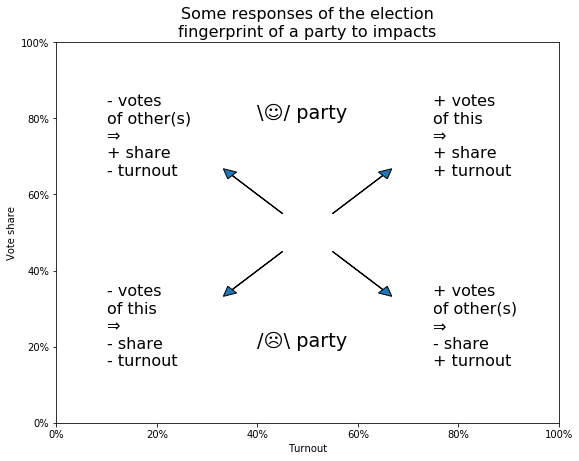

In [120]:
old_figsize = plt.rcParams["figure.figsize"]
try:
    plt.rcParams["figure.figsize"] = [9, 7]
    drd.plot_explanatory_fingerprint_responses(fontsize=16)
finally:
    plt.rcParams["figure.figsize"] = old_figsize

In [122]:
len(df_susp)

2011

The below plots present how the distribution of the votes for the top suspects (0% to 50% of the ranking) is different from that in case of the bottom suspects.

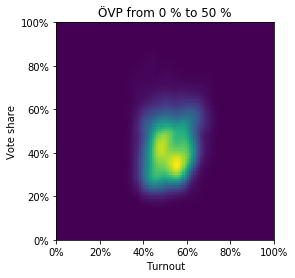

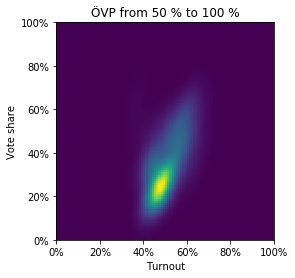

In [123]:
# %debug

def plot_party_fingerprint(party, start_perc, end_perc):
    l = len(ranking)
    groups = ranking.group[int(l * start_perc):int(l * end_perc)]
    df_act = df_susp[df_susp["group"].isin(groups)]
    drd.plot_fingerprint(df_act[party], df_act[info.valid_votes], df_act[info.registered_voters], 
                         "%s from %d %% to %d %%" % (party, start_perc * 100, end_perc * 100))


plot_party_fingerprint("ÖVP", 0, 0.5)
plot_party_fingerprint("ÖVP", 0.5, 1.0)

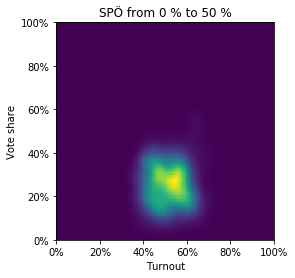

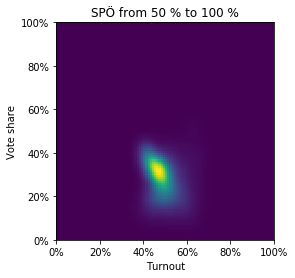

In [124]:
plot_party_fingerprint("SPÖ", 0, 0.50)
plot_party_fingerprint("SPÖ", 0.50, 1.00)

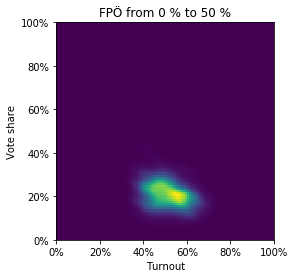

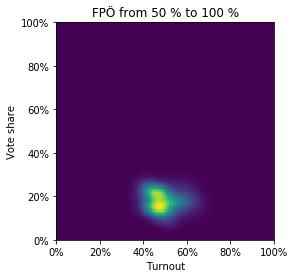

In [125]:
plot_party_fingerprint("FPÖ", 0, 0.50)
plot_party_fingerprint("FPÖ", 0.50, 1.00)

As we may notice, the plots change both in degree of dispersion and mean value as we progress from top to bottom suspects, for each three examined parties.

# Wild thoughts

Not sure if there's anything to notice on these charts at this stage - the best data found to date from Austria is much much less detailed (consists of fewer records) than that from Poland (data for >20k wards) or Hungary (~13k electoral wards).

From this little amount, we could (had we been able to rule out suspicious correlations) conjecture that the contrast between more and less suspicious areas would look very odd for ÖVP, and there may even be a bit of smudge in the high share/high turnout corner, but this can all easily be down to some spurious correlation and the hectics of a Gaussian kernel being used in the distribution estimation.

But if we stick with wanting to notice things...:

The vote shares from less to more suspicious

* ÖVP: 😊 improve a lot
* SPÖ: 😞 worsen a lot 
* FPÖ: = roughly stagnate

Interestingly, the top suspicious areas seem to exhibit much more multimodality than the less suspicious ones.

Also interesting that in case of the "top hit" of suspicions, G7072, listed in [2.](#ref_2), the SPÖ numbers really appear to include a suspiciously high number of repeats, whilst it is much more the ÖVP last digit recurrence that lead the examinations towards that group. Smells like sloppiness, at least!


A few things should be noted:
- Despite it is hard to see what happens on the final plots, using kernel smoothing on the plots helped a lot, and top candidates look interesting - if there was a somewhat well designed electoral fraud, carried out by a larger number of people, that could very easily look like this! The patterns could be explained, for instance, by a virtual ballot stuffing (doctoring), that then clearly favoured ÖVP, disfavoured SPÖ, but how invented numbers would go unnoticed by the counting system - I cannot comment on that.
- It is very interesting that the top suspect charts are very visibly more multimodal than the bottom ones. It would be very interesting to color these plots to see if these clusters are due to something trivial, such as ward count correlated with political preference, perhaps alongside geographical location (such as in case of Poland) or municipality size.
- One thing to check is whether Vienna results tended to appear towards the end of the list. It seemed like that after a very quick glance. This, similary to the previous point, may mean that some practically noticeable bias is still there in the ranking (this is not at all a finished branch of the explorations yet). However, "loner" wards are probably okay to get a high probablility score such as 1.0, and parts of Vienna effectively seem to form standalone 1-ward groups in the data when examined by groups formed of those defined by equality of the first four characters of GKZ codes, so then that explains the phenomenon.

# Conclusion

Whilst I could detail wild theories, such as a botnet of vote counters (I sincerely think something similar is a possibility in Hungary) - one problem with voluntary vote counting is that it's probably easy to infiltrate - I guess it's best to both wait to see more clearly, for others opinion (esp. people capable of cross-checking these with geopolitical specifics, if that at all seems for worthwhile for them to do), as well as to just continue with looking into the details behind these shiny (yes I can create even uglier ones! :D) but very possibly deceiving plots.

What I would raise is that it appears as if ÖVP's results were recorded with a slight bit of undue sloppiness.

More info for the mighty:

* The [GitHub repo](https://github.com/brezniczky/ep_elections_2019_hun) hosting the analyses - this all comes from a Hungarian election fraud proof attempt

* Specifically, the [Polish analysis](https://www.kaggle.com/brezniczky/poland-2019-ep-elections-doctoring-quick-check/) and the [Hungarian document](https://nbviewer.jupyter.org/github/brezniczky/ep_elections_2019_hun/blob/master/report.ipynb) containing the above (a very slightly different earlier version) and some yet-to-be-implemented fraud check strategies and a lot of details about the methodology. It is very applied and I am just an enthusisast.

* Where these fingerprint plots come from: a scientifically much more correct and verbose detailing of similar and different approaches to electoral fraud investigation [Forensic analysis of Turkish elections in 2017–2018](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0204975) by Peter Klimek, Raúl Jiménez, Manuel Hidalgo, Abraham Hinteregger, Stefan Thurner from 2018. Actually the above plots are a modified version in that they are weighted by the vote count relating to the ward that each point represents, prior to the smoothing, so thus we can observe the distribution of votes rather than the preference-turnout relationship of electoral wards.

* The [DrDigit Python package](https://github.com/brezniczky/drdigit/) (feel free to contribute!, see [Issue #1](https://github.com/brezniczky/drdigit/issues/1) - there are many methods that could be put to a package, you are welcome to report bugs, share thoughts, experiences etc.)

# Closing words

It is You who decides what you believe.

Thanks to the exploding analytical space You are in a better position than ever to check on your beliefs.

Any suspicion in your country? It might be easier than you'd think to just grab some data and take a look! Or to go and count the votes yourself... or something else - taking things in your hands.

Democracies exist as long as voters maintain them.